In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV


In [2]:
dataset = pd.read_csv('C:/Users/Manasa/Downloads/archive/car_data.csv')
print(dataset)

     User ID  Gender  Age  AnnualSalary  Purchased
0        385    Male   35         20000          0
1        681    Male   40         43500          0
2        353    Male   49         74000          0
3        895    Male   40        107500          1
4        661    Male   25         79000          0
..       ...     ...  ...           ...        ...
995      863    Male   38         59000          0
996      800  Female   47         23500          0
997      407  Female   28        138500          1
998      299  Female   48        134000          1
999      687  Female   44         73500          0

[1000 rows x 5 columns]


In [3]:
(dataset.shape)

(1000, 5)

In [4]:
dataset.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [5]:
dataset.tail()

,User ID,Gender,Age,AnnualSalary,Purchased
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1
999,687,Female,44,73500,0


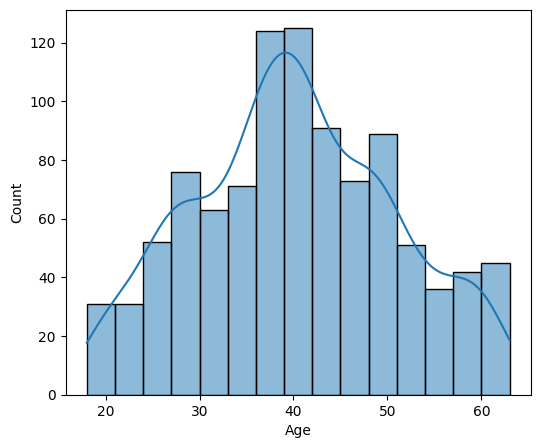

In [6]:
fig = plt.figure(figsize = (6,5))
sns.histplot(data = dataset,x = 'Age', kde = True)
plt.show()

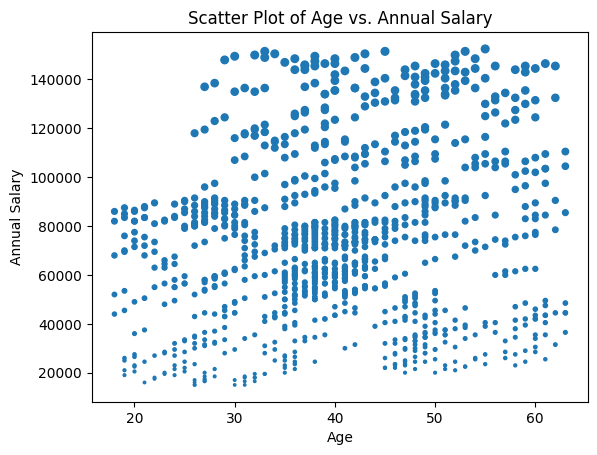

In [7]:
plt.scatter(data=dataset, x='Age', y='AnnualSalary', s=2/10000*dataset['AnnualSalary']); plt.xlabel('Age'); 
plt.ylabel('Annual Salary'); plt.title('Scatter Plot of Age vs. Annual Salary'); plt.show()


<Axes: >

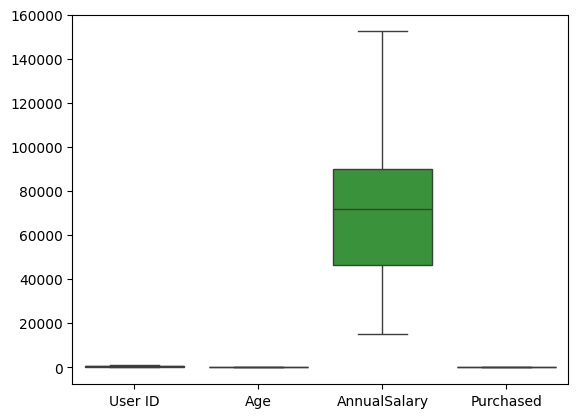

In [8]:
sns.boxplot(dataset)

In [9]:
dataset.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [11]:
dataset.isnull().any()

User ID         False
Gender          False
Age             False
AnnualSalary    False
Purchased       False
dtype: bool

In [12]:
dataset.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

<Axes: >

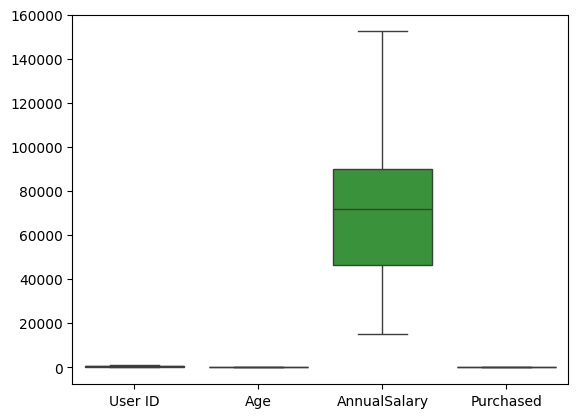

In [13]:
sns.boxplot(dataset)

In [14]:
dataset=dataset.drop(columns=['User ID', 'Gender'])

In [15]:
dataset.columns

Index(['Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [16]:
dataset

,Age,AnnualSalary,Purchased
0,35,20000,0
1,40,43500,0
2,49,74000,0
3,40,107500,1
4,25,79000,0
...,...,...,...
995,38,59000,0
996,47,23500,0
997,28,138500,1
998,48,134000,1


In [24]:
dataset.head()

,Age,AnnualSalary,Purchased
0,35,20000,0
1,40,43500,0
2,49,74000,0
3,40,107500,1
4,25,79000,0


In [25]:
dataset.tail()

,Age,AnnualSalary,Purchased
995,38,59000,0
996,47,23500,0
997,28,138500,1
998,48,134000,1
999,44,73500,0


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset.drop(['Purchased'], axis=1),
dataset['Purchased'], test_size=0.3, random_state=909)


In [18]:
from sklearn.tree import DecisionTreeClassifier
DT_model=DecisionTreeClassifier(random_state=192)
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=192)

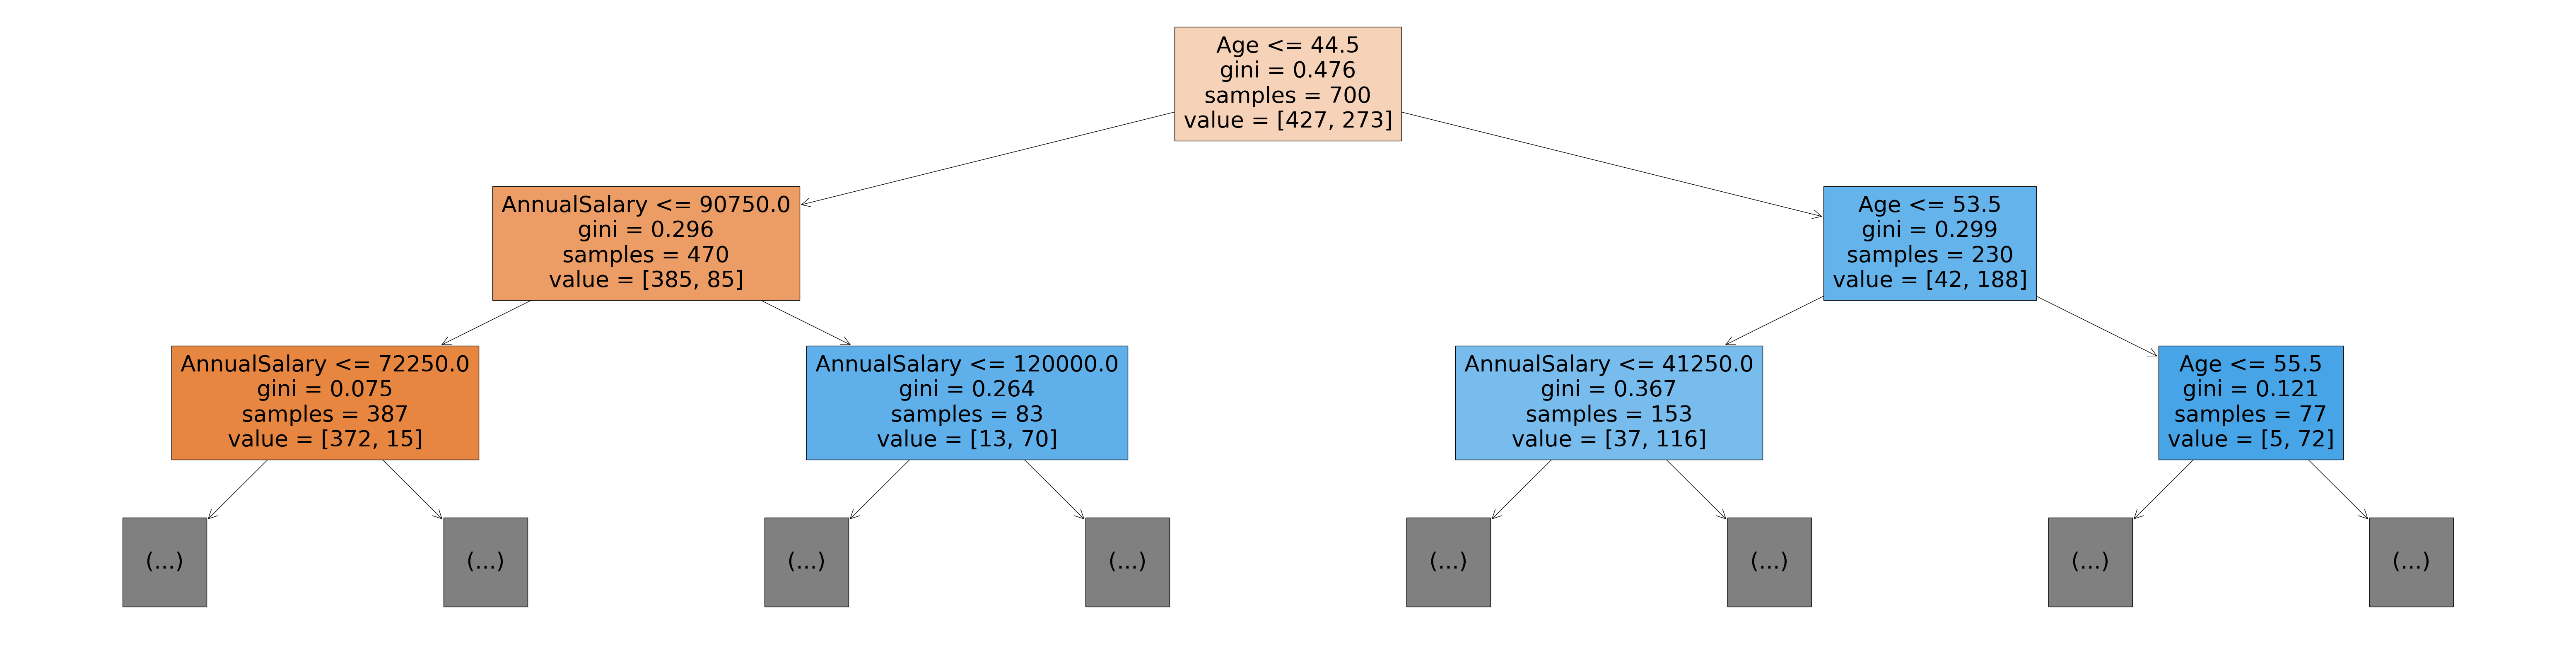

In [19]:
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt
feature_names = list(x_train.columns)
plt.figure(figsize=(80, 20))
plot_tree(DT_model, feature_names=feature_names, max_depth=2, filled=True) 
plt.show()


In [20]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf', random_state=0)
svc_model.fit(x_train, y_train)


SVC(random_state=0)

In [21]:
from sklearn.metrics import classification_report
y_train_pred = svc_model.predict(x_train)
y_test_pred = svc_model.predict(x_test)
print("Training Metrics:")
print(classification_report(y_train, y_train_pred))
print("Testing Metrics:")
print(classification_report(y_test, y_test_pred))

Training Metrics:
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       427
           1       0.85      0.48      0.61       273

    accuracy                           0.76       700
   macro avg       0.79      0.71      0.72       700
weighted avg       0.78      0.76      0.74       700

Testing Metrics:
              precision    recall  f1-score   support

           0       0.69      0.97      0.81       171
           1       0.92      0.43      0.59       129

    accuracy                           0.74       300
   macro avg       0.81      0.70      0.70       300
weighted avg       0.79      0.74      0.72       300



In [26]:
prediction=DT_model.predict((np.array([[35,20000]])))
if prediction[0]=='purchased':
    binary_prediction=1
else:
    binary_prediction=0
    print("The purchase prediction for the given customer criteria is:",binary_prediction)

The purchase prediction for the given customer criteria is: 0


c:\Users\Manasa\Downloads\archive\car_prediction_1\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [23]:
import pickle
pickle.dump(DT_model,open("model_decision_tree.pkl",'wb'))